In [1]:
import stdpopsim as sim
import tskit as tsk

ModuleNotFoundError: No module named 'stdpopsim'

### Simulation

In [ ]:
species = sim.get_species("HomSap")                                                     # Load pre-saved stdpopkit species

# Init parameters

model = sim.IsolationWithMigration(NA=1e4, N1=1e4, N2=1e4, T=1.94e4, M12=0, M21=0)         # Define the model with our own parameters
contig = species.get_contig(mutation_rate=1e-8, chromosome='chr1', left=0, right=1e6)   # Create a default contig but with a length of 1e6 and a mutation rate of 0
samples = {
    "pop1": 10,                                                                         # Select sample size
    "pop2": 10
}
engine = sim.get_engine("msprime")                                                      # Set msprime as the simulation engine

In [ ]:
ts = engine.simulate(model, contig, samples)    # Run the simulation

### Tests with the new tree

In [ ]:
ts.breakpoints(as_array=True)

print("There are ", ts.num_trees, "trees and ", ts.num_nodes, "nodes, of which", ts.num_samples, "are sample nodes")


There are  2878 trees and  1880 nodes, of which 40 are sample nodes


In [ ]:
# Define population colours (BETTER VERSION OF THIS CODE IN MAIN.IPYNB)

node_colours = {}
for node_index, node in enumerate(ts.tables.nodes):
    if (node.flags & tsk.NODE_IS_SAMPLE) != 0:
        pop = node.population
        if pop == 0: # pop1
            node_colours[node_index] = "red"
        elif pop == 1: # pop2
            node_colours[node_index] = "blue"
        elif pop == 2: # ancestral
            node_colours[node_index] = "green"

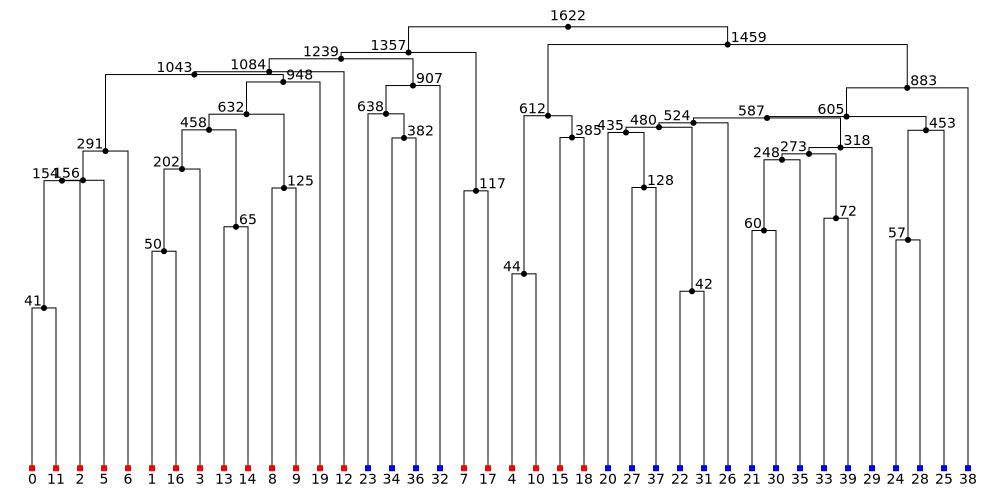

In [ ]:
ts.at_index(0).draw(node_colours=node_colours, width=1000, height=500, time_scale='log_time')

### Dump into a file

In [ ]:
ts.dump('../../data/sim/IM_m0_T1_chr1_1e4.trees')

In [2]:
import tskit as tsk

In [3]:
testSequence = tsk.load('../../data/sim/IM_m0_T1_chr1_1e4.trees')
testTree = testSequence.at_index(0)

In [5]:
%%timeit
len(list(testTree.leaves()))

108 μs ± 26.2 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [6]:
%%timeit
testTree.num_tracked_samples()

641 ns ± 91.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
